0. Instalación de los paquetes para el Análisis de Sentimientos. En donde la pregunta de Análisis es ¿Como ha variado la percepción de los consumidores sobre el Iphone sobre los últimos 4 modelos?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U spacy  #Es el tokenizador Análisis de Sentimientos
!spacy download es_core_news_lg  #Diccionario en Español
!spacy download en_core_web_sm  #Diccionario en Ingles

!pip install vaderSentiment
!pip install wordcloud

!pip uninstall numpy
!pip install numpy==1.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's d

0. Se procede con la carga de las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('punkt') #Optimizador de la maquina
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #Analizador de sentimientos
from nltk.tokenize import word_tokenize,sent_tokenize  #Tokenizador de oraciones

from textblob import TextBlob #Traductor de textos

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1. Se cargan los documentos de análisis

In [ ]:
#Se procede con la lectura de los documentos
nxl1=open('/content/drive/MyDrive/Colab Notebooks/Review 2021-Iphone 13.txt').read()

nxl_tk1=sent_tokenize(nxl1)
print(nxl_tk1[:5])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 2453: invalid start byte

In [ ]:
#Se procede con la lectura de los documentos
nxl1=open('/content/drive/MyDrive/Colab Notebooks/Review 2021-Iphone 13.txt', encoding='latin-1').read()
#The encoding is specified as 'latin-1' when opening the file.

nxl_tk1=sent_tokenize(nxl1)
print(nxl_tk1[:5])

["The iPhone 13 is no longer Apple's newest smartphone, though it may well be a more tempting buy than its successor.", 'The iPhone 14 (and 15) series is out, and the main device in the series is pretty similar to the 13 with the same cameras, display, chipset  and design.', 'You can check out our iPhone 14 review to find our full notes on the device.', "That's a shame, because in our initial iPhone 13 review, we noted that it didn't bring a huge number of features over the iPhone 12, though it did have a few tweaks here and there.", "On paper, you'd be hard pressed to find a reason why Apple didn't call the iPhone 13 the iPhone 12S."]


3. Se procede con el análisis de sentimientos.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The iPhone 13 is no longer Apple's Newest Smartphone, Though it May Well Be a More Tempting Buy Than ITS Successor.
{'neg': 0.095, 'neu': 0.733, 'pos': 0.172, 'compound': 0.2023}
The iPhone 14 (and 15) series is out, and the main device in the series is pretty similar to the 13 with the Same cameras, display, chipset and design.
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.4939}
You can check out ur iPhone 14 review to find out full notes on the device.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
That's a Shame, Because in Our Initial iPhone 13 Review, We Noted That It Didn't Bring A Huger Number of features over the iPhone 12, Though it Did has a few tweaks here and there.
{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.5142}
On Paper, you The Design is Largely The Same, The Specs Don't Look Huggely Different, and there are Mlay Headline-Group New Features.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
If you do want a bigger upgrade them MIGHT NOT 

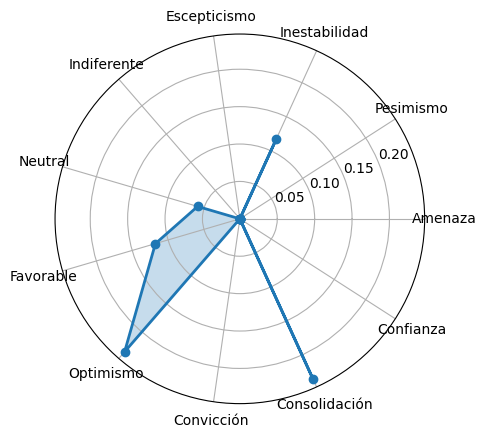

In [ ]:
#Traductor de Textos
from textblob import TextBlob
import textblob.exceptions
#import matplotlib.pyplot as plt

#Se cargan las librerias de análisis de sentimientos
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #diccionario 70 idiomas
sia=SentimentIntensityAnalyzer()

#----------------------------------------------------------------
#Se procede con el análisis de sentimientos - nxl
#---------- Iphone -----------------------------------------
XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
nXC=np.zeros((11,1))
Xtoks=[];Xpol=[]; pos1=[]

blob=TextBlob(nxl1)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk1=sent_tokenize(str(tblob))

for tokens in nxl_tk1:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC[pos]=nXC[pos]+1
  pos1.append(pos[0][0])

nXC=nXC/len(nxl_tk1)
nXC[5,]=(nXC[4,]+nXC[6,])/2

#Se crea el informe en un formato Excel - Contexto 2020
dfm=pd.DataFrame(np.column_stack((Xtoks,Xpol,pos1)))
dfm.to_excel('Iphone_13.xlsx')

#--------------------------------------------------------
#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))

labels=['Amenaza', 'Pesimismo', 'Inestabilidad',
        'Escepticismo', 'Indiferente', 'Neutral',
        'Favorable', 'Optimismo', 'Convicción',
        'Consolidación', 'Confianza']

plt.figure()
plt.polar(angles,values,'o-',linewidth=2)
plt.fill(angles, values,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()
